# Popular Data Science Questions

This project was final project of fuzzy language course. As an analyst, you have to build your intuition and know what do when it comes to vague requests or suggestions in work place to deliver more accurate results and suggestions. Hence, in this project, you will learn to use Data Science Stack Exchange to determine what content should a data science company create, based in interest by subject. 

In this project, you are working for a compnay that create data science content, be it books, online articles, videos or interactive text-based platforms. Your taks invlove figuring out what is the best content to write about. You realize that the "best" right there is fuzzy language. What does "best" here actually refer to what term?
Since you are passionate about helping people learn and grow, you decide to surf the Internet in search for the answer to the question "What is it that people want to learn about in data science?". You figure out from Stack Overflow that [Stack Exchange](https://stackexchange.com/) is a part of a question and answer website newtwork.  Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

After spending some time investigating the website, you decide that the tags will be very useful in categorizing content, saving you the trouble of you having to do it yourself. Now comes to the accessing the data altogether, one potential solution is to scrape the site. However, there is another easier option: Stack Exchange provides a public data base for each of its websites. You can find this by clicking [here](https://data.stackexchange.com/datascience/query/new). 

## Getting the Data

To get the relevant data for year 2020 we run the following query:

SELECT Id, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount <br>
FROM posts <br>
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2020;

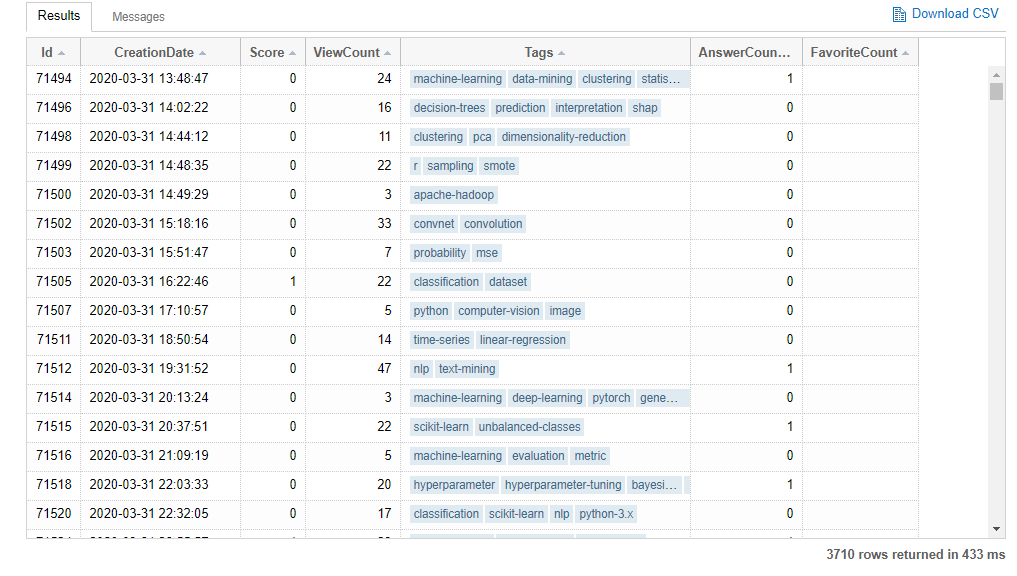
There we will get CSV file for analysis. For the dataset, these columns are as following:
- *Id*: an identification number for the post
- *CreationDate*: the date and time of creation of the post
- *Score*: the post's score
- *ViewCount*: how many times the post was viewed
- *Tags*: what tags were used
- *AnswerCount*: how many answers the question got ( only applicable to question posts) 
- *FavoriteCount*: how many times the question was favoured ( only applicable to question posts)


## Exploring the Data

We cab read in the data while immeditaly ensuring that CreationDate will be stored as a datetime object.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

questions = pd.read_csv("2020_questions.csv", parse_dates=["CreationDate"])
questions.info()
questions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710 entries, 0 to 3709
Data columns (total 7 columns):
Id               3710 non-null int64
CreationDate     3710 non-null datetime64[ns]
Score            3710 non-null int64
ViewCount        3710 non-null int64
Tags             3710 non-null object
AnswerCount      3710 non-null int64
FavoriteCount    379 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 203.0+ KB


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,71494,2020-03-31 13:48:47,0,24,<machine-learning><data-mining><clustering><st...,1,NaN
1,71496,2020-03-31 14:02:22,0,16,<decision-trees><prediction><interpretation><s...,0,NaN
2,71498,2020-03-31 14:44:12,0,11,<clustering><pca><dimensionality-reduction>,0,NaN
3,71499,2020-03-31 14:48:35,0,22,<r><sampling><smote>,0,NaN
4,71500,2020-03-31 14:49:29,0,3,<apache-hadoop>,0,NaN


We see that only FavoriteCount column contains missing values. A missing value on this column probably means that the question was not present in any user's favorite list, so we can replace the missing values with 0. After filling missing values with 0, there is no need to store value in FavoriteColumn in float type anymore, and instead change into integer type. 

Additionally, since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are. We'll keep them as a list. 

In [2]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that values in this column are in string type. On Stack Exchange, each question can only have a maximum of 5 tags, so one way to deal with this column is to create five columns in questions (Tag1, Tag2, Tag3, Tag4, Tag5) and populate the columns with the tags in each row. 

Let's begin cleaning the data!

## Cleaning the Data

In [3]:
# modify FavouriteCount column like mentioned above
questions["FavoriteCount"].fillna(0, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

# modify the Tags column to make it easier to work with
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
833,72491,2020-04-17 15:00:08,0,55,"[keras, tensorflow, normalization, sequence]",0,0
869,66825,2020-01-21 13:19:59,0,121,"[python, random-forest]",1,0
3597,70033,2020-03-21 12:10:24,1,36,"[machine-learning, lstm, xgboost, forecasting]",0,0


## Most used and most viewed

We now focus on determining the most popular tags. We'll do so by considering 2 different popularity proxies: for each tag we'll count how mnay times the tag was used and how many times the tags was viewed. 

We could take into account the score, or whether or not a question is part of someone's favourite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now. 

### Most used

In [4]:
# create a frequency table for each tag
tag_count = {}

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
# change from a dict to a dataframe and rename the column's name
tag_count = pd.DataFrame.from_dict(tag_count, orient = "index")
tag_count.rename(columns={0:"Count"}, inplace=True)
tag_count.head(10)

,Count
machine-learning,1066
data-mining,96
clustering,120
statistics,118
decision-trees,92
prediction,54
interpretation,8
shap,9
pca,34
dimensionality-reduction,21


Let's now sort the dataframe by Count and visualize the top 20 results!

In [5]:
most_used = tag_count.sort_values("Count").tail(20)
most_used

,Count
data-mining,96
predictive-modeling,104
statistics,118
clustering,120
r,122
pandas,138
regression,147
dataset,157
lstm,162
cnn,186


The threshold of 20 is somewhat arbitrary, and we can experiemnt with others. However, the popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data. 

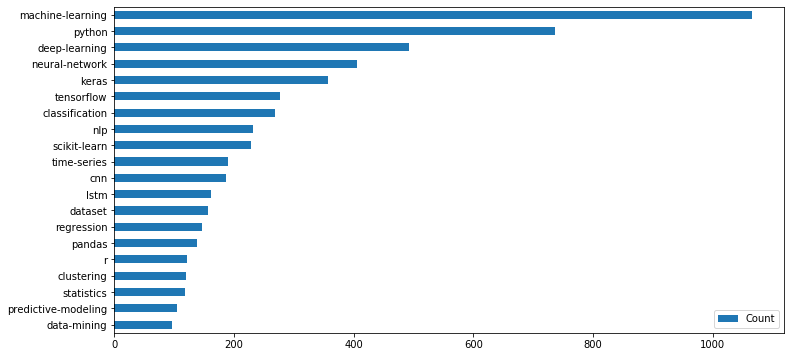

In [6]:
most_used.plot(kind="barh", figsize=(12,6))

Some tags are very very broad, and are unlikely to be useful such as Python, R and dataset. Before we go into deeper investigation, let's repeat the same process for most viewed tags.

### Most viewed

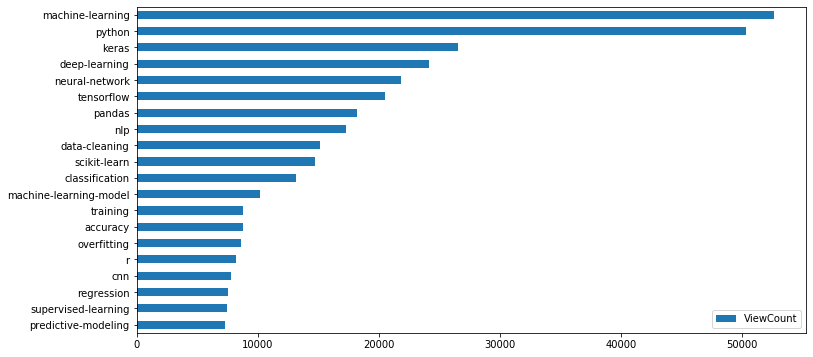

In [7]:
tag_view_count = {}

for idx, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag] = questions["ViewCount"].iloc[idx]
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values("ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(12,6))

## Relation Between Most_used and Most_viewed

Let's see them side by side:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023284F3BA08>],
      dtype=object)

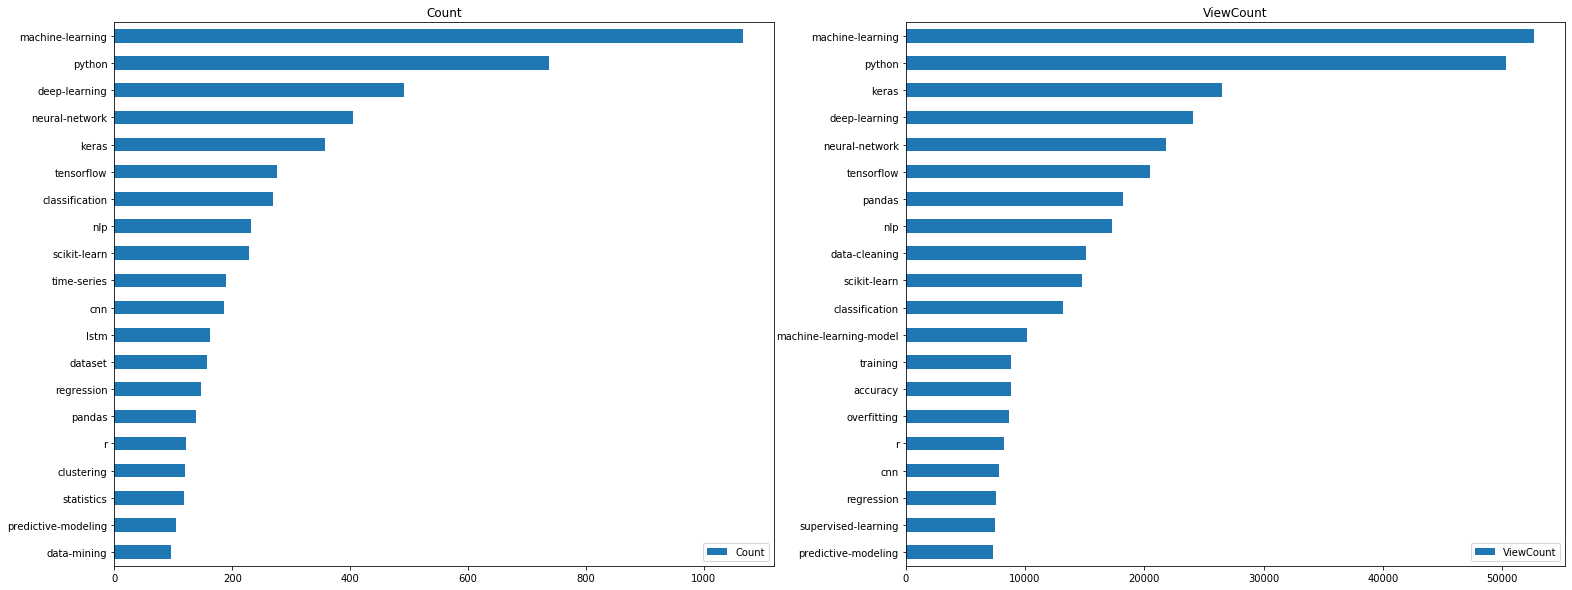

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((26, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

Looking at the graph above, we can see that the most top tags were present in both dataframes (most_used and most_viewed).

In [9]:
# see what tags in most_used but not in most_viewed
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
data-mining,96,NaN
predictive-modeling,104,7284.0
statistics,118,NaN
clustering,120,NaN
r,122,8198.0
pandas,138,18227.0
regression,147,7547.0
dataset,157,NaN
lstm,162,NaN
cnn,186,7818.0


The tags present in most_used but not in most_viewed are:
- time-series
- lstm
- data-mining
- statistics 
- clustering
- dataset

In [10]:
# see what tags in most_viewed but not in most_used
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
predictive-modeling,104.0,7284
supervised-learning,NaN,7463
regression,147.0,7547
cnn,186.0,7818
r,122.0,8198
overfitting,NaN,8625
accuracy,NaN,8794
training,NaN,8800
machine-learning-model,NaN,10192
classification,269.0,13158


Tags are present in most_viewed but not in most_used are:
- supervised-learning
- overfitting
- accuracy
- data-cleaning
- training

Some tags also stand out as being related. For instance, pandas is related to python as pandas is one of python's libaries. So by writing about pandas, we can actually simultaneously tackle 2 tags. other pairs of tags are not realted at all, for instance: r and python. 

In [11]:
questions[questions["Tags"].apply(lambda tags: True if "lower(r)" in tags and "lower(pandas)" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount


## Relation between tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's figure it out!

In [12]:
# create a list of all tags 
all_tags = list(tag_count.index)

# create a dataframe where each row will represent a tag, and each column as well 
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4, 0:4]

,machine-learning,data-mining,clustering,statistics
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
clustering,NaN,NaN,NaN,NaN
statistics,NaN,NaN,NaN,NaN


Let's now fill those dataframe with 0 and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells how many times they were used together. 

In [13]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

KeyboardInterrupt: 

This dataframe is quite large, let'äs then focus on most used tags. We'll add some colors to make it easier to talk about the dataframe. 

In [14]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,data-mining,predictive-modeling,statistics,clustering,r,pandas,regression,dataset,lstm,cnn,time-series,scikit-learn,nlp,classification,tensorflow,keras,neural-network,deep-learning,python,machine-learning
data-mining,15,7,3,1,0,0,0,1,0,0,0,1,0,0,0,0,3,7,1,12
predictive-modeling,7,19,4,0,0,0,1,1,0,0,0,0,1,1,0,0,3,9,2,13
statistics,3,4,21,1,0,0,0,2,1,0,0,0,0,0,0,0,2,3,1,10
clustering,1,0,1,21,1,0,0,2,0,0,0,0,0,1,1,0,0,0,0,6
r,0,0,0,1,12,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4
pandas,0,0,0,0,0,13,0,1,0,0,1,2,2,0,0,0,0,0,10,0
regression,0,1,0,0,0,0,14,2,1,0,2,2,0,4,0,1,1,1,1,6
dataset,1,1,2,2,0,1,2,22,1,1,0,0,0,2,0,1,2,3,6,6
lstm,0,0,1,0,0,0,1,1,16,0,4,0,1,1,1,3,4,1,2,4
cnn,0,0,0,0,0,0,0,1,0,24,0,1,0,2,5,9,6,4,2,6


It's still quite hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before doing such, we need to get rid of values in blue, otherwise the colors will be too skewed.

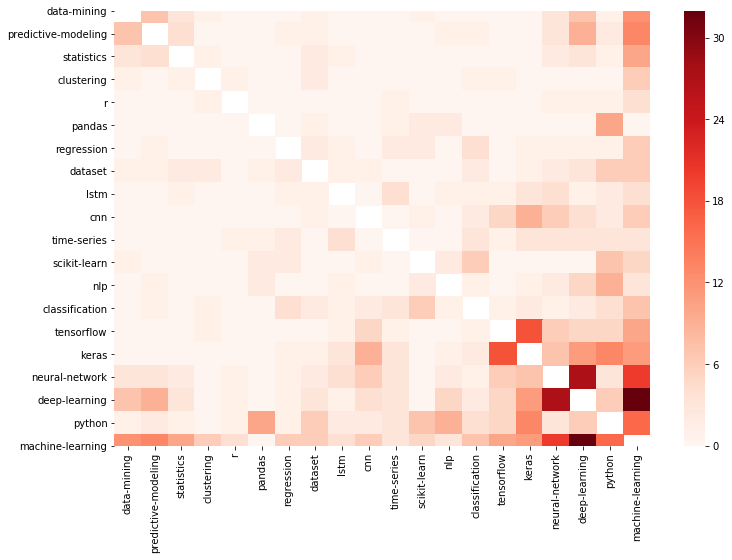

In [15]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN
    
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Reds", annot=False)

The mót used tags also seem to have the strongest relationships, as given by the darker concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relationship between them... 

Another shortcoming is that it only looks at relations between pairs of tags and not between multiple groups of tags.

In order to tackle both of these problems, there is a powerful data mining technique called association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are. We won't get into details of it, as the techniques is quite out of scope at the moment. But it's worth investigating for future purpose.

## Enter Domain Knowledge

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network). 

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be pretty precise, then we can suggest the creation of Python content that uses deep learning for classification problems (and of course, variations of this suggestion).

## Solidify findings

Before jumping to conclusions, it would be nice to solidify our findings with additional proof. Could interest in deep learning be slowing down? We will track the interest in deep learning across time. 

Going back to query tab, we will collect another datset that holds the result of all of the questions ever asks on Data Science Stack Exchange (DSSE), their dates and tags.

SELECT Id, CreationDate, Tags <br>
FROM posts <br>
WHERE PostTypeId = 1; <br>

The dataset was downloaded as like before. 

In [16]:
all_ques = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_ques["Tags"] = all_ques["Tags"].str.replace("^<|>$", "").str.split("><")
all_ques.head()

,Id,CreationDate,Tags
0,6760,2015-08-11 09:26:26,"[nlp, topic-model]"
1,6765,2015-08-11 19:28:29,"[machine-learning, data-mining, r, predictive-..."
2,6768,2015-08-11 22:21:42,"[machine-learning, python, svm, scikit-learn]"
3,6773,2015-08-12 14:01:23,[r]
4,6774,2015-08-12 14:16:42,"[python, markov-process]"


Before deciding which questions should be classified as being deep learning questions, we should clasify which tags are deep learning tags. 

By Googling, looking at tags in most_used and reading the tags description, you decide these tags belong to deep learning:
- lstm
- cnn
- scikit-learn
- tensorflow 
- keras
- neural-network 
- deep-learning

In [17]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_ques["DeepLearning"] = all_ques["Tags"].apply(class_deep_learning)
all_ques.sample(5)

,Id,CreationDate,Tags,DeepLearning
2369,33572,2018-06-24 14:20:24,"[machine-learning, normalization]",0
12934,10919,2016-03-27 15:50:52,"[beginner, career]",0
19209,56716,2019-07-31 20:31:14,"[image-classification, tools, annotation]",0
3272,30267,2018-04-13 10:48:43,"[machine-learning, data-mining, dataset, reinf...",0
1271,43927,2019-01-13 16:59:14,"[neural-network, keras, tensorflow]",1


The data science technology landscape is not something as dynamic to merit daily, weekly or even monthly. Let's track it quarterly. 

In [18]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_ques["Quarter"] = all_ques["CreationDate"].apply(fetch_quarter)
all_ques.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,6760,2015-08-11 09:26:26,"[nlp, topic-model]",0,15Q3
1,6765,2015-08-11 19:28:29,"[machine-learning, data-mining, r, predictive-...",0,15Q3
2,6768,2015-08-11 22:21:42,"[machine-learning, python, svm, scikit-learn]",1,15Q3
3,6773,2015-08-12 14:01:23,[r],0,15Q3
4,6774,2015-08-12 14:16:42,"[python, markov-process]",0,15Q3


For the final stretch of this screen, we'll group by quarter and:
- Count the number of deep learning questions 
- Count the total number of questions
- Compute the ratio between the 2 numbers above

In [19]:
quarterly = all_ques.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]

# The following is done to help with visualizations later
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
14,17Q4,352,895,0.393296
8,16Q2,109,517,0.210832
12,17Q2,225,645,0.348837
0,14Q2,9,157,0.057325
21,19Q3,938,2379,0.394283


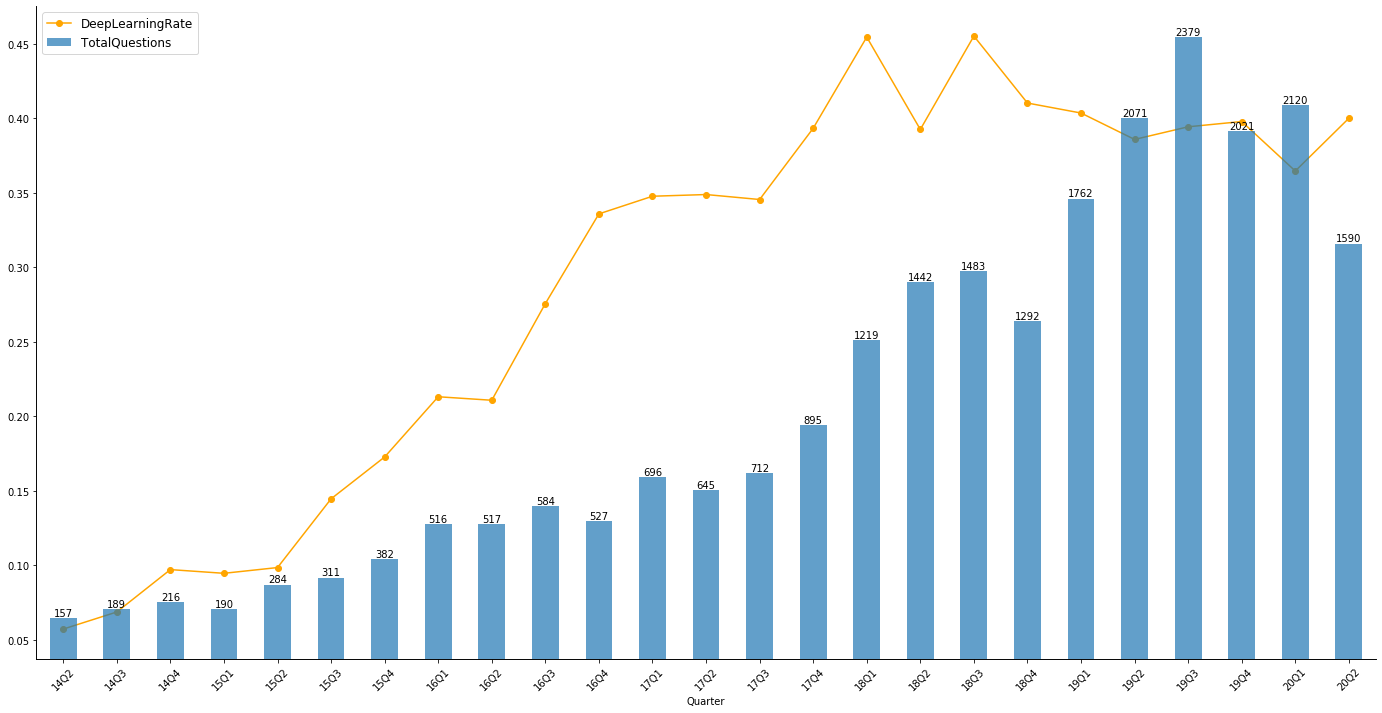

In [20]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate", kind="line", linestyle="-", marker="o", color="orange", figsize=(24,12))

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no obvious evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.